# Project: Investigating Brazillian No-Show Medical Appointments 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>
    This report attempts to explore a dataset containing 100k medical appointments in Brazil and aims to understand the contributing factors that determines if a patient attends the appointment. First, the data needs to be cleaned, the steps are detailed in the data wrangling section. Next, a series of hypotheses are presented that attempt to find correlations between the various variables. Finally, these questions are discussed and the findings are presented.
</p>

<p>
   First, we should load pandas and numpy
</p>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Set the style for the graphs
sns.set_style('darkgrid')

## Data Wrangling

<p>
    Firstly, the dataset is loaded from the provided CSV file, and the key properties and types are displayed:
</p>

In [2]:
rawDf = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

rawDf.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The key characteristics included in each row are:
<ul>
    <li><b>ScheduledDay</b> - The date that the patient booked the appointment</li>
    <li><b>Neighborhood</b> - The location of the hospital</li>
    <li><b>Scholarship</b> - Indicates if the patient is enrolled in Bolsa Familia, the Brasilian welfare program</li>
    <li><b>Gender</b> - The gender of the patient</li>
    <li><b>Age</b> - The age of the patient</li>
    <li><b>No Show</b> - Indicates if the patient showed to the appointment - 'Yes' means the patient did not show up</li>
</ul>

<p>
    The datatypes of the data set are as follows:
</p>

## General Properties
This section will analyse the structure of the data to ensure, identify any outliers and discuss issues with the dataset. 
    
First, the types of each column are listed

In [3]:
rawDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<b style='color: red'>- No-show is boolean, represented as string</b> All other boolean fields are represented as int64, while the no-show field is a string. Also, the name no-show is a confusing name, this should ideally be renamed

<hr />

In [4]:
# It looks like some of these are objects, check the types to see if its a date or a string
print("AppointmentDay: " + type(rawDf['AppointmentDay'][0]).__name__)
print("ScheduledDay: " + type(rawDf['AppointmentDay'][0]).__name__)

AppointmentDay: str
ScheduledDay: str


<b style='color: red'>- Date fields are strings</b> It looks like the AppointmentDay and ScheduledDay fields are both string representations of the date. This will make it difficult to analyse. These should be converted to Date objects

<hr />

Check the boolean fields to make sure they are all within range:

In [5]:
# Grab the unique Gender fields to make sure that they are all either M or F
print("Gender: ")
print(rawDf['Gender'].unique())

# Get the scholarship fields to make sure they are either true (1) or false (0)
print("\nScholarship:")
print(rawDf['Scholarship'].unique())

# Get the Hipertension fields to make sure they are either true (1) or false (0)
print("\nHipertension:")
print(rawDf['Hipertension'].unique())

# Get the Alcoholism fields to make sure they are either true (1) or false (0)
print("\nAlcoholism:")
print(rawDf['Alcoholism'].unique())

# Get the Handcap fields to make sure they are either true (1) or false (0)
print("\nHandcap:")
print(rawDf['Handcap'].unique())

# Get the Diabetes fields to make sure they are either true (1) or false (0)
print("\nDiabetes:")
print(rawDf['Diabetes'].unique())

# Get the SMS_received fields to make sure they are either true (1) or false (0)
print("\nSMS_received:")
print(rawDf['SMS_received'].unique())

Gender: 
['F' 'M']

Scholarship:
[0 1]

Hipertension:
[1 0]

Alcoholism:
[0 1]

Handcap:
[0 1 2 3 4]

Diabetes:
[0 1]

SMS_received:
[0 1]


<b style='color: green'>+ Gender, Scholarship, Hipertension, Diabetes & SMS_received are within range</b>


<b style='color: red'>- Handcap field contains non boolean values</b>  According to https://www.kaggle.com/joniarroba/noshowappointments the Handcap data should only be true or false

<hr />

Next, check the non boolean fields:

In [6]:
# Check the Neighbourhood fields
print("\nNeighbourhood:")
print(rawDf['Neighbourhood'].unique())

# Check the Age fields
print("\nAge:")
print(rawDf['Age'].unique())


Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA DO PRÍNCIPE' 'R

<b style='color: red'>- Neighbourhood is all caps</b> This is hard to read

<b style='color: red'>- Age contains a value of -1</b> A person cannot have a negative age, so this needs to be removed. Note that there is an age '0', but assume this is okay as it is likely a newborn baby

Take a look at the strange age field:

In [7]:
rawDf[rawDf['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


<hr />

In [8]:
# Ensure that there are no duplicates
rawDf['AppointmentID'].duplicated().sum()

0

<b style='color: green'>+ No duplicates</b>

## Data Cleaning 
Now that the issues have been identified (outlined in red), the next step is to clean it

In [9]:
# Convert the string date fields into Date objects
rawDf['AppointmentDay'] = pd.to_datetime(rawDf['AppointmentDay'])
rawDf['ScheduledDay'] = pd.to_datetime(rawDf['ScheduledDay'])

# Drop the Handcap fields that are greater than 1 (2, 3, 4)
rawDf.drop(rawDf[rawDf['Handcap'] > 1].index, inplace = True)

# Make the Neighbourhood field a title to be a bit more readable
rawDf['Neighbourhood'] = rawDf['Neighbourhood'].str.title()

# Exponentials are hard to read, lets change it to an int
rawDf['PatientId'] = rawDf['PatientId'].astype(int)

# Drop the Age field that is -1
rawDf.drop(rawDf[rawDf['Age'] < 0].index, inplace = True)

# Copy the dataframe so we can rename fields without mutating the original
df = rawDf.copy()

# Make the columns snake case to make it easier to work with in Python
df.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']

# The no show field is confusing and not a boolean. Make it like the others and rename it to 'success' to remove ambiguity
df['success'] = np.where(df['no_show'] == 'No', 1, 0)
df.drop('no_show', axis = 1, inplace = True)

# Finally, show the resulting dataset
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,success
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,1


<hr />
<a id='eda'></a>
## Exploratory Data Analysis
Now that the data has been cleaned, various questions are presented in an attempt to understand the correlation between the variables in the dataset. We want to determine what is a good indicator for if someone shows up to an appointment or not. Based on this, we want to look at the following
<ol>
    <li>Is there is any relationship between gender and the likelyhood the patient will show?</li>
    <li>Is there a relationship between other individual traits (scholarship, hipertension, diabetes, alcoholism, handcap, sms received) and whether the customer shows?</li>
    <li>Are there are any particular neighbourhoods that have a higher chance of showing?</li>
    <li>Are there particular age brackets that are more likely to show?</li>
    <li>Are there are any particular days or months that patients are more likely to show?</li>
    <li>Are repeat patients more likely to show?</li>
    <li>Given the above, can we look at the combination of 2 variables</li>
</ol>

### Generic Functions
Set up some helper functions that we can use later

In [10]:
# Group by success and a second value and then generate the % success
def generate_simple_analysis(df, groupped_value):
    a = df.groupby(['success', groupped_value]).count()['patient_id']
    a = a.unstack(level = 0)
    a['total'] = a[0] + a[1]
    a['%_success'] = a[1] / a['total']
    return a

<hr />

## 1. Gender
Attempt to find if there are any correlations between the gender of the patient and the likelyhood that they show to the appointment.
This is achieved by grouping the gender with the success value, then plotting it on a bar chart to show the correlation, if any. 

Text(0,0.5,'Percentage')

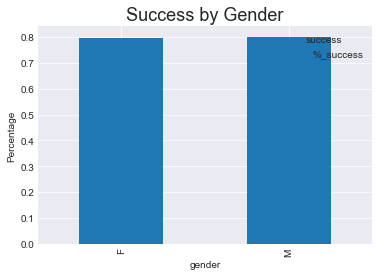

In [59]:
# Group by gender and count the total number 
gender_groupped = df.groupby(['success', 'gender']).count()['patient_id'] 

# Unstack it so we have both the success (1) and unsuccessful (0)
gender_groupped = gender_groupped.unstack(level = 0)

# Create a total column which is the sum of both
gender_groupped['total'] = gender_groupped[0] + gender_groupped[1]

# Generate a % of success so it's a better indicator than simple raw numbers
gender_groupped['%_success'] = gender_groupped[1] / gender_groupped['total']
gender_groupped[['%_success']].plot.bar()

plt.title("Success by Gender", fontsize = 18)
plt.ylabel("Percentage")


<b style='color: red'>- There doesn't look like to be any significant difference between gender and the success rate of turning up to an appointment </b>

## 2. Correlations
Next, we attempt to undcover if there are any correlations between success and any of the other single dependent variables. This is achieved by using the pandas library to calculate the 'Pearsons R' value for each of the variables. Any values approaching 1 or -1 indicate a correlation between the success rate and the dependent variable.

In [12]:
df['scholarship'].corr(df['success'])

-0.029390574536307213

In [13]:
df['hipertension'].corr(df['success'])

0.036175874201493624

In [14]:
df['diabetes'].corr(df['success'])

0.015169351261922566

In [15]:
df['alcoholism'].corr(df['success'])

0.00024458951218007924

In [16]:
df['handcap'].corr(df['success'])

0.007762077995618917

In [17]:
df['sms_received'].corr(df['success'])

-0.1266782067897104

### Observations
<b style='color: red'>- The correlations between the variables analysed are weak.</b> Neither the scholarship, hipertension, diabetes, alcoholism or handcap appear to have any effect on the likelyhood that the patient shows to the appointment. The highest Pearsons R value identified is the Sms received which indicates a negative correlation of -0.12. However, this value is too weak to provide any conclusions. A future experiment would be to test frequency of SMS and at varying times before the appointment. This could impact the correlation, however it is outside the scope of this analysis. 

## 3. Neighbourhood
There may be some neighbourhoods that are higher or lower in terms of success rate. Let's explore to see if there is a difference

In [199]:
# Get the total counts
neighbourhood = df.groupby(['neighbourhood', 'success']).count()
b = neighbourhood['age']

# Unstack so we only have success or not
b = b.unstack()

# Rename columns
b.columns = ['no_show','show']

# Fill in some nulls
b.fillna(0, inplace = True)

# Calculate the total
b['total'] = b['no_show'] + b['show']

# Calculate the % of show against the total
b['%_show'] = b['show'] / b['total']
b['%_no_show'] = b['no_show'] / b['total']

Text(0,0.5,'Percentage')

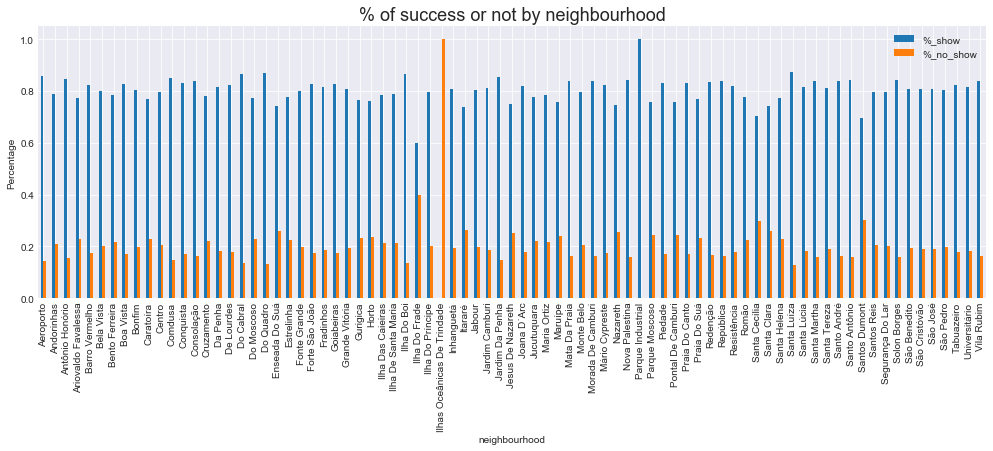

In [200]:
b[['%_show', '%_no_show']].plot.bar(figsize=(17,5))
plt.title("% of success or not by neighbourhood", fontsize = 18)
plt.ylabel("Percentage")

In [201]:
# Let's find all the outliers using the standard box and whiskers chart. 
# We can then use this to analyse 2D data later

# Outlier > q3 + (1.5 * IQR) or
# outlier < q1 - (1.5 * QIR)
# where IQR is q3 - q1
iqr = 0.215915 - 0.177797
q3 = b.quantile(0.75)
q1 = b.quantile(0.25)

# Determine outliers for no shows
b[b['%_no_show'] > q3['%_no_show'] + (1.5 * iqr)]

,no_show,show,total,%_show,%_no_show
neighbourhood,,,,,
Ilha Do Frade,2.0,3.0,5.0,0.600000,0.400000
Ilhas Oceânicas De Trindade,2.0,0.0,2.0,0.000000,1.000000
Santa Cecília,72.0,171.0,243.0,0.703704,0.296296
Santos Dumont,215.0,494.0,709.0,0.696756,0.303244


In [202]:
b[b['%_no_show'] < q1['%_no_show'] - (1.5 * iqr)]

,no_show,show,total,%_show,%_no_show
neighbourhood,,,,,
Parque Industrial,0.0,1.0,1.0,1.0,0.0


<b style='color: green'>- We observe from this that in the outliers the neighbourhoods of Ilha Do Frade, Ilhas Oceânicas De Trindade, Santa Cecília and Santos Dumont have a very high % of no shows whilst the  Parque Industrial have a very low % of no shows </b>


## 4. Age
Take a look into age to see if it affects anything

In [40]:
# Double check unique values
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 102, 115, 100,  99])

In [41]:
# Copy into new df for work
age = df[['age', 'success']].copy()

In [42]:
# Group everything into age
def group_age (row):
    if row['age'] <= 20 :
        return '0-20'
    elif row['age'] <= 30:
        return '21-30'
    elif row['age'] <= 40:
        return '31-40'
    elif row['age'] <= 50:
        return '41-50'
    elif row['age'] <= 60:
        return '51-60'
    elif row['age'] <= 70:
        return '61-70'
    elif row['age'] <= 80:
        return '71-80'
    elif row['age'] <= 90:
        return '81-90'
    else:
        return '>90'

In [43]:
# Add a new column that is the groupped age
age['groupped_age'] = age.apply(lambda row: group_age (row), axis = 1)

In [44]:
# Get the total counts
groupped_age = age.groupby('groupped_age').count()
groupped_age.drop('age', inplace = True, axis = 1)
groupped_age.columns = ['total']
groupped_age.head()

,total
groupped_age,
0-20,31797
21-30,13771
31-40,15027
41-50,14402
51-60,15639


Text(0,0.5,'Percentage')

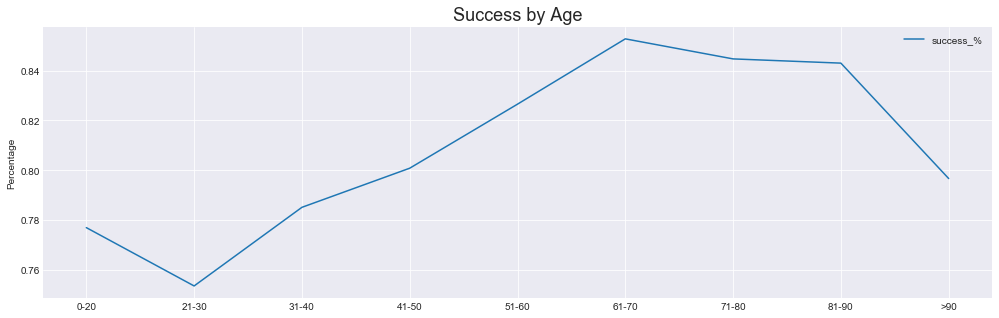

In [90]:
# Get the successes by summing (1 is success and 0 is not)
age_success = age.groupby('groupped_age').sum()
groupped_age['success'] = age_success['success']

# Get the %
groupped_age['success_%'] = groupped_age['success'] / groupped_age['total']
groupped_age['index'] = groupped_age.index
groupped_age.reset_index(inplace = True)
ax = groupped_age[['success_%']].plot(figsize=(17,5))

# Set x axis
ax.set_xticks(groupped_age.index)
ax.set_xticklabels(groupped_age['index'])

plt.title("Success by Age", fontsize=18)
plt.ylabel("Percentage")

<b style='color:green'>- There is a slight trend, the lowest group is 21-30 with the highest being 61-70</b>

## 5. Time
We want to see if any of the following exists:
1. If there is any correlation between the appointment day and success rate (i.e. if a Monday is more successful than a Friday)
2. If there is any correlation between the appointment month and success rate (i.e. if there is a particular month that is more successful)
3. If the difference between appointment date and when they set the date indicates a success rate (i.e. is the closer the booking date in advance the more likely it is successful)

### Day vs success
We first explore the day of the week to success rates

In [64]:
# Convert the appointmentday and shceduled_day
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])

Text(0,0.5,'Percent')

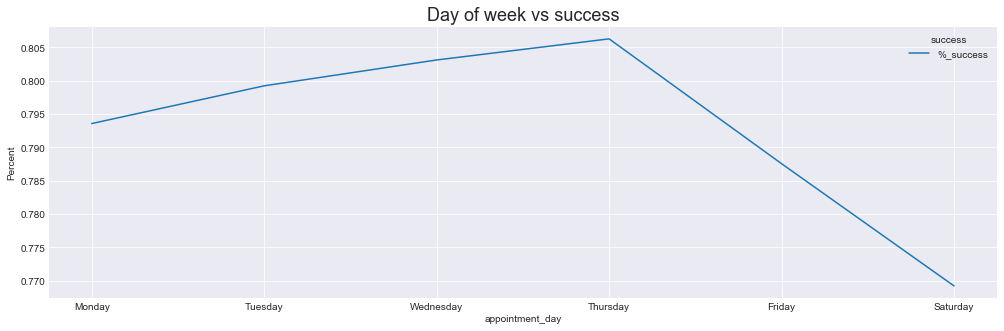

In [85]:
day_of_week = generate_simple_analysis(df, df['appointment_day'].dt.dayofweek)

# Make table more readable with names instead of numbers
day_of_week['day'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = day_of_week[['%_success']].plot(figsize=(17, 5))

ax.set_xticks(day_of_week.index)
ax.set_xticklabels(day_of_week['day'])
plt.title("Day of week vs success", fontsize=18)
plt.ylabel("Percent")

<b style="color:green">- It looks like it rises up to a peak of Thursday before dropping off rapidly on Friday and Saturday</b>

### Month vs Success

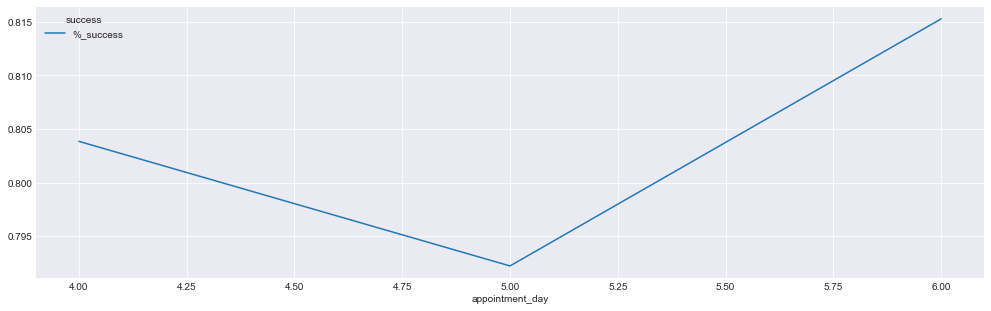

In [92]:
month_of_week = generate_simple_analysis(df, df['appointment_day'].dt.month)
month_of_week[['%_success']].plot(figsize=(17, 5))

<b style="color:red">- We don't have a lot of data here and it looks roughly the same so we're going to ignore this for now</b>

### Difference in appointment and schedule vs success

In [93]:
df['difference'] = df['appointment_day'].dt.date - df['scheduled_day'].dt.date

Text(0,0.5,'Percent')

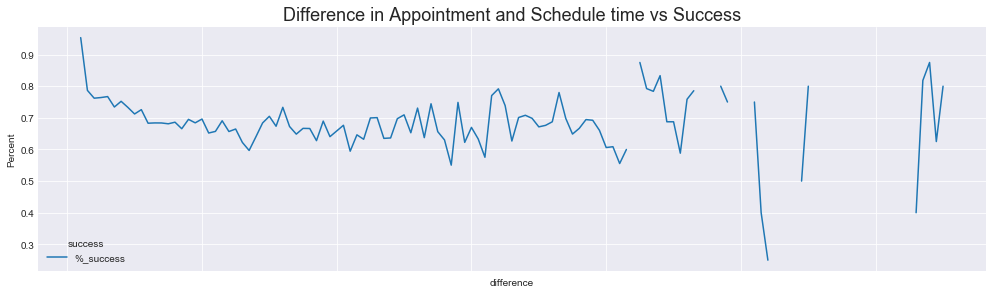

In [124]:
difference = generate_simple_analysis(df, 'difference')
ax = difference[['%_success']].plot(figsize=(17, 5))
# difference['index'] = difference.index
difference.reset_index(inplace = True)

# Remove some dummy data
difference.drop([0, 1], inplace = True)

# Remove some Nans
difference.fillna(0, inplace = True)

plt.title("Difference in Appointment and Schedule time vs Success", fontsize=18)
plt.ylabel("Percent")

<b style="color:red">Data is spread out everywhere but doesn't look like there is much of a difference. Before we move on lets try grouping first</b>

In [125]:
# Convert into a number
difference['difference'] = (difference['difference'] / np.timedelta64(1, 'D')).astype(int)

In [128]:
# We want to divide into ~10 blocks. We should find the count, max and then figure out the groups
difference['difference'].describe()

count    129.000000
mean      67.294574
std       43.180110
min        0.000000
25%       32.000000
50%       64.000000
75%       96.000000
max      179.000000
Name: difference, dtype: float64

Text(0,0.5,'Percent')

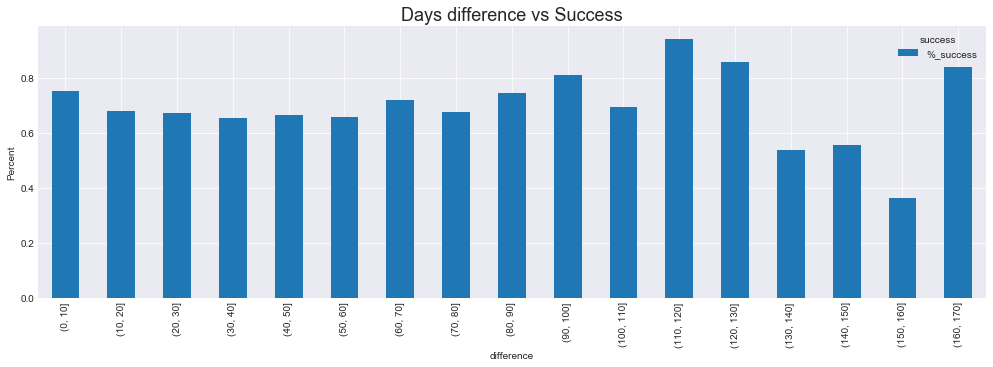

In [179]:
# Looks like 179 is the max, so we'll divide by 10 which gives ~17 each
# However based on the previous chart there's more data at the beginning so lets group by 10 to start

# We cut it to groups of 10
cut = difference.groupby(pd.cut(difference['difference'], np.arange(0, 179, 10))).sum()
cut['total'] = cut[0] + cut[1]
cut['%_success'] = cut[1] / cut['total']

ax = cut[['%_success']].plot.bar(figsize=(17,5))

plt.title("Days difference vs Success", fontsize=18)
plt.ylabel("Percent")

<b style='color:green'>- We can see there's some changes towards the end of the spectrum. It may be optimal to book between 110-130 days but avoid it afterwards</b>

## 6. Repeat patients
Are repeat patients more likely to be successful?

In [180]:
# number of unique patients
len(df.patient_id.unique())

62190

In [181]:
# Total bookings
df.patient_id.count()

110327

In [182]:
# We can see there are patients who have booked more than once
df['repeat'] = df['patient_id'].duplicated()

# We only want the last booking of repeat customers
df.drop_duplicates(subset = 'patient_id', keep = 'last', inplace = True)

Text(0,0.5,'Percentage')

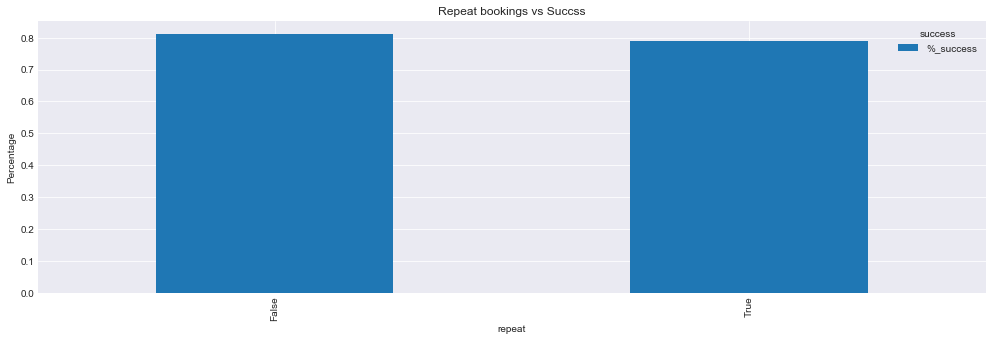

In [185]:
repeat = generate_simple_analysis(df, 'repeat')
repeat[['%_success']].plot.bar(figsize=(17, 5))

plt.title("Repeat bookings vs Succss")
plt.ylabel("Percentage")

<b style='color:red'>There isn't really a difference in success for a repeat patient</b>

## Multi Variable Analysis
The following we have seen have impact on the success rate and we will dive deeper into them:
- Day of appointment
- Neighbourhood
- Groupped age

In [186]:
success = df[df['success'] == 1].copy()

### Day of appointment and Neighbourhood Success Rate
Based on the previous data, can we combine the two and infer something? So for example, will Santa Cecília and Santos Dumont on a Thursday have a higher success rate than Ilhas Oceânicas De Trindade, Parque and Illha Do Boi on a Friday or Saturday?


Text(0.5,1,'High Success Rate neighbourhood and appointment vs success')

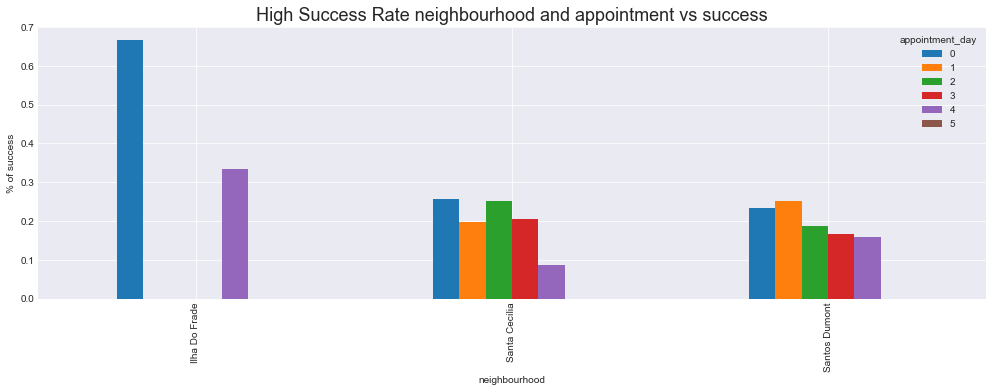

In [208]:
a1 = success.groupby(['neighbourhood', success.appointment_day.dt.dayofweek]).count()['patient_id'] 
a1 = a1.unstack(level = 1)

a1.fillna(0, inplace = True)
a1['total'] = a1[0] + a1[1] + a1[2] + a1[3] + a1[4] + a1[5]

for column in a1:
    a1[column] = a1[column] / a1['total']

a1.drop('total', inplace = True, axis = 1)

a1[a1.index.isin(['Santa Cecília', 'Santos Dumont', 'Ilhas Oceânicas De Trindade', 'Ilha Do Frade'])].plot.bar(figsize = (17, 5))
plt.ylabel('% of success')

plt.title("High Success Rate neighbourhood and appointment vs success", fontsize=18)

<a id='conclusion'></a>
# Conclusions

From all the analysis we can draw the following conclusions:
1. There are some neighbourhoods that have a higher success rate at booking. Namely Santa Cecília, Santos Dumont, Ilhas Oceânicas De Trindade and Ilha Do Frade
2. That as the days of the week starts it trends up until Thursday which is the peak until falling down to its lowest levels on Friday and Saturday
3. There may be some correlation between the days between bookings (i.e. booking date - when they booked). The success rate is fairly stable but rises to the highest during the 110-130 day period before dropping significantly afterwards. It seems to rise at the 160 day point again though more analysis needs to be done on this
4. There is a slight trend in regards to age and success. With the lowest group being 21-30 and the highest being 61-70